In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
import pandas as pd


1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

Text(0, 0.5, 'No of Samples')

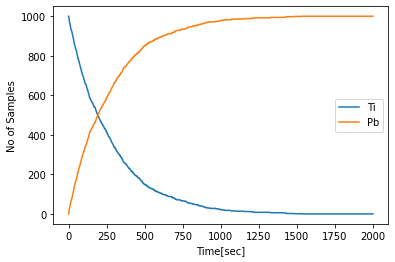

In [3]:
inter=2000 
n=1000 
 
Ti_curr=np.ones(n)

Pb_curr=np.zeros(n)

Ti_t=np.empty(inter)
Pb_t=np.empty(inter)

Ti_t[0]=np.sum(Ti_curr)
Pb_t[0]=np.sum(Pb_curr)

# Seconds half life
tau=3.052*60 

for t in range (1,inter):
    for i in range(n):
        if (np.random.uniform()<=1.-2**(-1/tau)): # every time step
            Ti_curr[i]=0
            Pb_curr[i]=1
    Ti_t[t]=np.sum(Ti_curr)
    Pb_t[t]=np.sum(Pb_curr)

    
    
plt.plot(Ti_t,label='Ti')
plt.plot(Pb_t,label='Pb')
plt.legend()
plt.xlabel('Time[sec]')
plt.ylabel('No of Samples')

Text(0, 0.5, 'Decaying Time [s]')

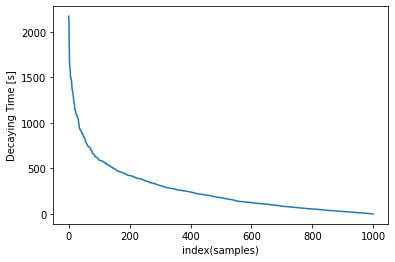

In [4]:
n=1000 # number of atoms

def icdf(p, mu=np.log(2)/tau):
    return -np.log(1-p)/mu

decay_t = icdf(np.random.random(n))

plt.plot(np.sort(decay_t)[::-1])
plt.xlabel('index(samples)')
plt.ylabel('Decaying Time [s]')

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

hit/miss method : 1.347332
Error:  0.00042199999999992244


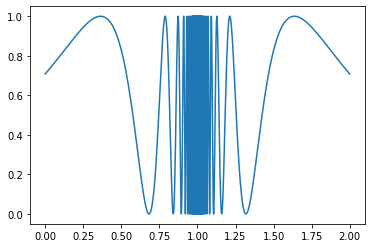

In [5]:
# Performing hit/miss METHOD
correct=1.34691 # Integral correct result

def f(x):
    return (np.sin(1/(1-x)))**2

x=np.linspace(0.00001,1.99999,100000)
plt.plot(x,f(x))

N=1000000
count=0
for i in range(N):
    x=2*np.random.random() # (Xly) by 2 as we need number between 0,2
    y=np.random.random()
    if y<f(x): count+=1
        
A=2*1 #Box area

I=A*count/N



print('hit/miss method :', I)
print("Error: ", np.abs(I-correct))

In [6]:
# Method (mean) 
corr=1.34691 
def f(x):
    return (np.sin(1/(1-x)))**2

N=1000000


x=2*np.random.random(N) 
In=2/N*np.sum(f(x))


print('Mean Result:', In)
print("Error: ", np.abs(In-corr))

Mean Result: 1.3450944267051794
Error:  0.0018155732948206271


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [7]:
# 2D
corr=np.pi 
N=1000000
c=0

for i in range(N): 
    x=2*np.random.random()-1 # -1,1
    y=2*np.random.random()-1 # -1,1
    if x**2+y**2<=1:
        c+=1
        
A=(2**2)*1 #Box Areaw
In=A*c/N
print('Result:', In)
print("Error: ", np.abs(In-corr))

Result: 3.141132
Error:  0.00046065358979330284


In [8]:
# 10 D
corr=np.pi**5/(120)  # Integral
N=1000000
c=0

for i in range(N):
    x=2*np.random.rand(10)-1 # -1,1
    r=(x**2).sum()
    if r<=1:
        c+=1
        
A=(2**10)*1  
In=A*c/N
print('Result:', In)
print("Error: ", np.abs(In-corr))

Result: 2.505728
Error:  0.044436039877345124


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [10]:
corr=0.83893
N=1000000

def w(x):
    return x**(-1/2)
def fun(x):
    return x**(-1/2)/(np.exp(x)+1)


x=np.random.random(N)**2
V=2
In=1/N*np.sum(fun(x)/w(x))*V

print('Sampling Method:', In)
print("Error: ", np.abs(In-corr))

Sampling Method: 0.8389370567696754
Error:  7.056769675495289e-06
